In [1]:
# Importing relevant modules
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Bayesian model selection

Bayesian model selection is an analytical tool that we can use to compare models with different numbers of parameters while integrating our physical understanding of the models to influence the analysis. 
For example, consider the following hypothetical *x,y*-data that is shown below (note that in addition to the data being manufactured so are the models discussed below, but bear with me).

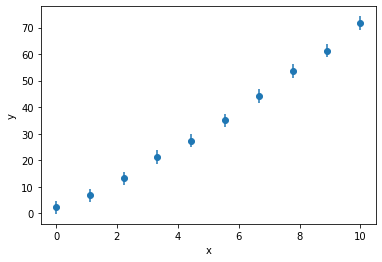

In [2]:
x, y, yerr = np.loadtxt('nested.txt', unpack=True)
plt.errorbar(x, y, yerr, marker='o', ls='')
plt.xlabel('x')
plt.ylabel('y') 
plt.show()

The experiment that gave rise to this data can be explained by either a linear or quadratic model:
1. $y = m x + c $ 
2. $y = ax^2 + bx + c$

In the literature, the model 2 is twice as common (due to model 1 being quantum mechanically forbidden). 
Let's find the likelihood for each of the models, as [discussed previously](./likelihood). 

In [3]:
def model1(x, m, c):
    return m * x + c

def model2(x, a, b, c):
    return a * x ** 2 + b * x + c

popt1, pcov1 = optimize.curve_fit(model1, x, y)
popt2, pcov2 = optimize.curve_fit(model2, x, y)

We will quickly visualise these two models to get a comparison. 

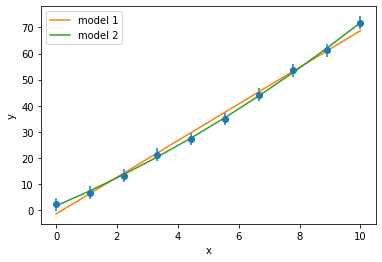

In [4]:
plt.errorbar(x, y, yerr, marker='o', ls='')
plt.plot(x, model1(x, *popt1), label='model 1')
plt.plot(x, model2(x, *popt2), label='model 2')
plt.xlabel('x')
plt.ylabel('y') 
plt.legend()
plt.show()

In [5]:
def loglike(x, y, dy, model, popt):
    return -0.5 * np.sum(np.square((y - model(x, *popt)) / dy) + np.log(2 * np.pi * dy ** 2))

l1 = loglike(x, y, yerr, model1, popt1)
l2 = loglike(x, y, yerr, model2, popt2)

print('ln[L(model1)] = {:.2e}'.format(l1))
print('ln[L(model2)] = {:.2e}'.format(l2))

ln[L(model1)] = -2.14e+01
ln[L(model2)] = -1.86e+01


Above, we can see that the more complex and less common model is more likely given the experimental data. 
Hopefully, we recognise that the model with more parameters is better suited to agree with the experimental data {cite}`mayer_drawing_2010`.

The above, likelihood values insinuate that model 2 is correct and any rationalisations that we draw should be based around this model. 
However, how do we know that:
1. We have not overfit by comparing a model with two-parameter against a model with one, 
2. We are correct given the preference for model 1 found in the literature. 

This is where Bayesian model selection can be used. 
Offering the ability to account for the greater number of parameters in a more complex model, while enabling a prior probability about the models to be integrated into the analysis. 